### XAI

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
zip_file = tf.keras.utils.get_file(origin='https://storage.googleapis.com/plantdata/PlantVillage.zip',
                                   fname='PlantVillage.zip', extract=True)

In [ ]:
import os
data_dir = os.path.join(os.path.dirname(zip_file), 'PlantVillage')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


In [ ]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))


total images for training : /root/.keras/datasets/PlantVillage/train : 43444files
total images for validation : /root/.keras/datasets/PlantVillage/validation : 10861files


In [ ]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
print('Number of classes:',len(class_names))

Number of classes: 10


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data generators

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        horizontal_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
    )


validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Use classes parameter to include only specific folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    classes=class_names)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    classes=class_names)

Found 14529 images belonging to 10 classes.
Found 3631 images belonging to 10 classes.


In [ ]:
# Define CNN architecture
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
import os
checkpoint_path = "training_cnn/my_checkpoints"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
     filepath=checkpoint_path,
     # Let's save only the weights of the model
     save_weights_only=True)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//train_generator.batch_size,
                  epochs=5,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples//validation_generator.batch_size,
                  callbacks=[checkpoint_cb])

Epoch 1/5
454/454 [==============================] - 211s 452ms/step - loss: 1.4842 - accuracy: 0.4938 - val_loss: 2.1593 - val_accuracy: 0.5329
Epoch 2/5
454/454 [==============================] - 200s 441ms/step - loss: 0.8316 - accuracy: 0.7142 - val_loss: 1.4141 - val_accuracy: 0.6314
Epoch 3/5
454/454 [==============================] - 196s 431ms/step - loss: 0.6274 - accuracy: 0.7823 - val_loss: 0.9462 - val_accuracy: 0.7223
Epoch 4/5
454/454 [==============================] - 198s 436ms/step - loss: 0.5198 - accuracy: 0.8222 - val_loss: 0.8654 - val_accuracy: 0.7497
Epoch 5/5
454/454 [==============================] - 197s 435ms/step - loss: 0.4751 - accuracy: 0.8333 - val_loss: 0.8684 - val_accuracy: 0.7597


In [ ]:
# Print accuracy and save the model (optional)
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Training accuracy: 0.8333448171615601
Validation accuracy: 0.7596791982650757


In [ ]:
os.listdir(checkpoint_dir)

['my_checkpoints.index', 'my_checkpoints.data-00000-of-00001', 'checkpoint']

In [ ]:
def create_model():
    model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [ ]:
new_model = create_model()

In [ ]:
loss, acc = new_model.evaluate(validation_generator, verbose=2)
print(f"Untrained model, accuracy: {100 * acc:5.2f}%")

114/114 - 7s - loss: 2.2990 - accuracy: 0.1355 - 7s/epoch - 60ms/step
Untrained model, accuracy: 13.55%


In [ ]:
new_model.load_weights(checkpoint_path)

In [ ]:
loss, acc = new_model.evaluate(validation_generator, verbose=2)
print(f"Trained model, accuracy: {100 * acc:5.2f}%")

114/114 - 7s - loss: 0.8654 - accuracy: 0.7604 - 7s/epoch - 61ms/step
Trained model, accuracy: 76.04%


In [ ]:
loaded_model = model

In [ ]:
loaded_model.save('/content/drive/MyDrive/trained_model/cnn')

In [ ]:
loaded_model = create_model()
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/trained_model/cnn')

### Model

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mohitpadhan/plantvillagecolorthresholded

Dataset URL: https://www.kaggle.com/datasets/mohitpadhan/plantvillagecolorthresholded
License(s): unknown
100% 315M/315M [00:16<00:00, 29.9MB/s]
100% 315M/315M [00:16<00:00, 19.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plantvillagecolorthresholded.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# zip_file = tf.keras.utils.get_file(origin='https://drive.google.com/uc?export=download&id=1JBk0-iSy-9b7PVlpYCXEYHXGtDd-uAhN',
#                                    fname='PlantVillage Color Thresholded.zip', extract=True)

In [ ]:
import os
# data_dir = os.path.join(os.path.dirname(zip_file), 'PlantVillage')
# train_dir = os.path.join(data_dir, 'train')
# validation_dir = os.path.join(data_dir, 'validation')
train_dir = "/content/train"
validation_dir = "/content/validation"

In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


In [ ]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))


total images for training : /content/train : 14529files
total images for validation : /content/validation : 3631files


In [ ]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
print('Number of classes:',len(class_names))

Number of classes: 10


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data generators

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        horizontal_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
    )


validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Use classes parameter to include only specific folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    classes=class_names)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    classes=class_names)

Found 14529 images belonging to 10 classes.
Found 3631 images belonging to 10 classes.


In [ ]:
# Define CNN architecture
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//train_generator.batch_size,
                  epochs=5,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/5
454/454 [==============================] - 197s 429ms/step - loss: 1.4976 - accuracy: 0.4762 - val_loss: 1.0092 - val_accuracy: 0.6369
Epoch 2/5
454/454 [==============================] - 198s 437ms/step - loss: 1.0322 - accuracy: 0.6414 - val_loss: 0.9930 - val_accuracy: 0.6709
Epoch 3/5
454/454 [==============================] - 195s 430ms/step - loss: 0.7710 - accuracy: 0.7307 - val_loss: 1.0494 - val_accuracy: 0.6532
Epoch 4/5
454/454 [==============================] - 197s 434ms/step - loss: 0.6541 - accuracy: 0.7702 - val_loss: 0.9048 - val_accuracy: 0.7171
Epoch 5/5
454/454 [==============================] - 197s 434ms/step - loss: 0.5656 - accuracy: 0.8052 - val_loss: 0.5038 - val_accuracy: 0.8285


In [ ]:
# Print accuracy and save the model (optional)
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Training accuracy: 0.8052010536193848
Validation accuracy: 0.8285398483276367


In [ ]:
# Print accuracy and save the model (optional)
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Training accuracy: 0.8052010536193848
Validation accuracy: 0.8285398483276367


In [ ]:
loaded_model = model

## GradCam1

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
def preprocess_image(img_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

In [ ]:
# Base image
img_path = '/content/tb73.JPG'
single_image = preprocess_image(img_path)
img_array = np.expand_dims(single_image, axis=0)

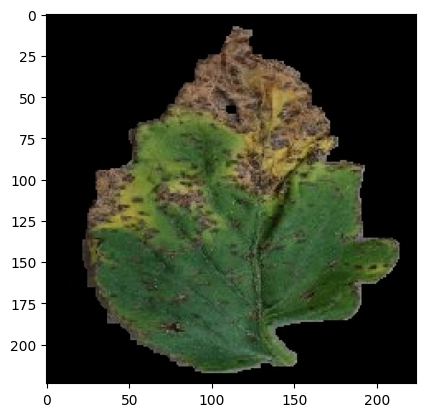

In [ ]:
plt.imshow(single_image)

1/1 [==============================] - 0s 28ms/step
Predicted: Tomato___Bacterial_spot


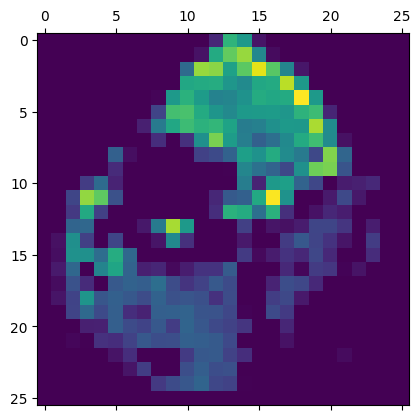

In [ ]:
# Print what the predicted class is
preds = model.predict(img_array)
print("Predicted:", class_names[np.argmax(preds[0])])

# Generate class activation heatmap
last_conv_layer_name = 'max_pooling2d_17'  # change this to the name of the last conv layer in your model
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

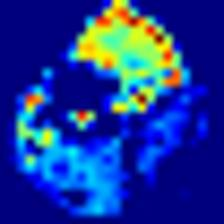

In [ ]:
def save_and_display_gradcam(img, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
    ## Loading the original image
    # img = keras.utils.load_img(img_path)
    # img = keras.utils.img_to_array(img)

    ## Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    ## Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    ## Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    ## Superimpose the heatmap on original image
    Superimposed_img = jet_heatmap * alpha + img
    Superimposed_img = keras.utils.array_to_img(Superimposed_img)

    ## Save the superimposed image
    Superimposed_img.save(cam_path)

    ## Displaying Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(single_image, heatmap)

## GradCam 2

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
def preprocess_image(img_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

In [ ]:
# Base image
img_path = '/content/tlbval188.JPG'
single_image = preprocess_image(img_path)
img_array = np.expand_dims(single_image, axis=0)

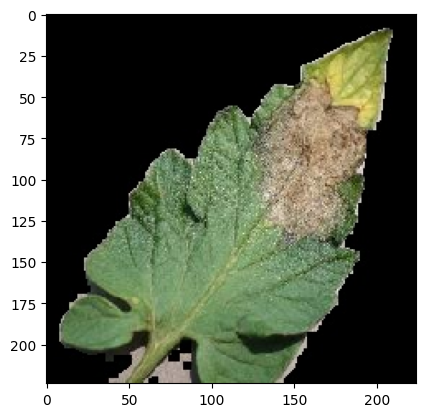

In [ ]:
plt.imshow(single_image)

1/1 [==============================] - 0s 35ms/step
Predicted: Tomato___Early_blight


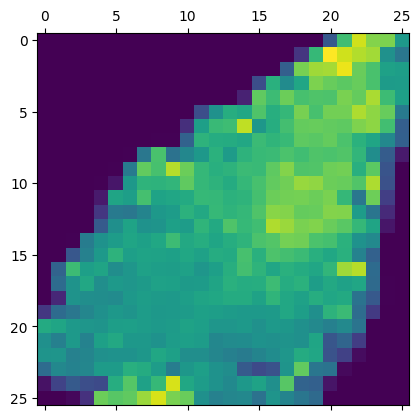

In [ ]:
# Print what the predicted class is
preds = model.predict(img_array)
print("Predicted:", class_names[np.argmax(preds[0])])

# Generate class activation heatmap
last_conv_layer_name = 'max_pooling2d_2'  # change this to the name of the last conv layer in your model
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

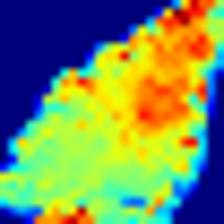

In [ ]:
def save_and_display_gradcam(img, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
    ## Loading the original image
    # img = keras.utils.load_img(img_path)
    # img = keras.utils.img_to_array(img)

    ## Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    ## Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    ## Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    ## Superimpose the heatmap on original image
    Superimposed_img = jet_heatmap * alpha + img
    Superimposed_img = keras.utils.array_to_img(Superimposed_img)

    ## Save the superimposed image
    Superimposed_img.save(cam_path)

    ## Displaying Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(single_image, heatmap)

## GradCam 3

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
def preprocess_image(img_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

In [ ]:
# Base image
img_path = '/content/three.JPG'
single_image = preprocess_image(img_path)
img_array = np.expand_dims(single_image, axis=0)

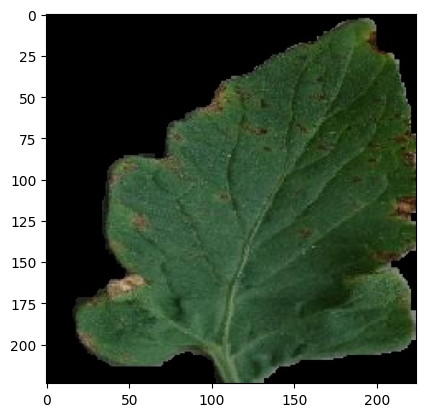

In [ ]:
plt.imshow(single_image)

1/1 [==============================] - 0s 26ms/step
Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


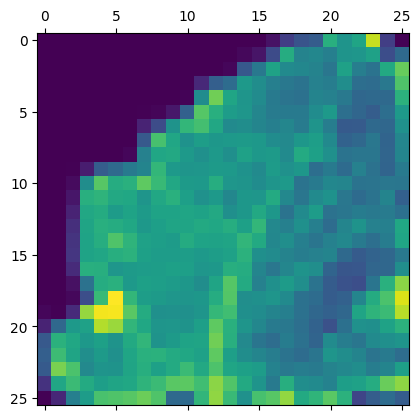

In [ ]:
# Print what the predicted class is
preds = model.predict(img_array)
print("Predicted:", class_names[np.argmax(preds[0])])

# Generate class activation heatmap
last_conv_layer_name = 'max_pooling2d_2'  # change this to the name of the last conv layer in your model
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

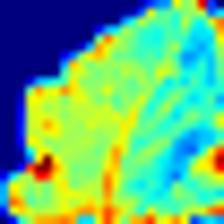

In [ ]:
def save_and_display_gradcam(img, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
    ## Loading the original image
    # img = keras.utils.load_img(img_path)
    # img = keras.utils.img_to_array(img)

    ## Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    ## Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    ## Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    ## Superimpose the heatmap on original image
    Superimposed_img = jet_heatmap * alpha + img
    Superimposed_img = keras.utils.array_to_img(Superimposed_img)

    ## Save the superimposed image
    Superimposed_img.save(cam_path)

    ## Displaying Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(single_image, heatmap)

## GradCam 4

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the predicted class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
def preprocess_image(img_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

In [ ]:
# Base image
img_path = '/content/tbspotval29.JPG'
single_image = preprocess_image(img_path)
img_array = np.expand_dims(single_image, axis=0)

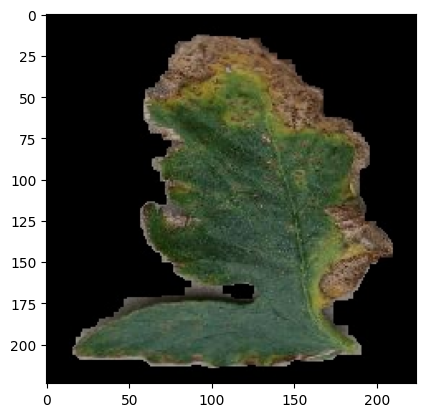

In [ ]:
plt.imshow(single_image)

1/1 [==============================] - 0s 28ms/step
Predicted: Tomato___Bacterial_spot


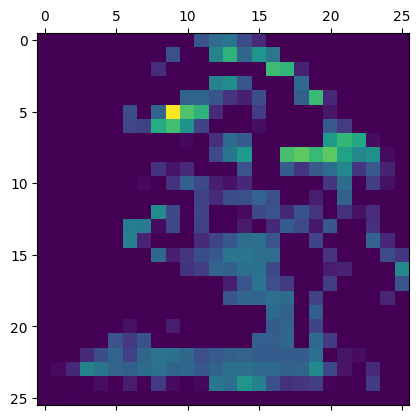

In [ ]:
# Print what the predicted class is
preds = model.predict(img_array)
print("Predicted:", class_names[np.argmax(preds[0])])

# Generate class activation heatmap
last_conv_layer_name = 'max_pooling2d_17'  # change this to the name of the last conv layer in your model
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


In [ ]:
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

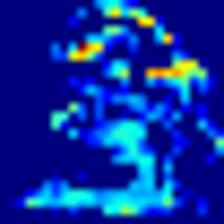

In [ ]:
def save_and_display_gradcam(img, heatmap, cam_path="save_cam_image.jpg", alpha=0.4):
    ## Loading the original image
    # img = keras.utils.load_img(img_path)
    # img = keras.utils.img_to_array(img)

    ## Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    ## Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    ## Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    ## Superimpose the heatmap on original image
    Superimposed_img = jet_heatmap * alpha + img
    Superimposed_img = keras.utils.array_to_img(Superimposed_img)

    ## Save the superimposed image
    Superimposed_img.save(cam_path)

    ## Displaying Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(single_image, heatmap)

## GradCam++

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model

In [ ]:
import requests
import os
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file

In [ ]:
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_17", label_name=None,
                  category_id=None):
    """Get a heatmap by Grad-CAM++.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

In [ ]:
def show_imgwithheat(img_path, heatmap, alpha=0.4, return_array=False):
    """Show the image with heatmap.

    Args:
        img_path: string.
        heatmap: image array, get it by calling grad_cam().
        alpha: float, transparency of heatmap.
        return_array: bool, return a superimposed image array or not.
    Return:
        None or image array.
    """
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = (heatmap*255).astype("uint8")
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    imgwithheat = Image.fromarray(superimposed_img)
    try:
        display(imgwithheat)
    except NameError:
        imgwithheat.show()

    if return_array:
        return superimposed_img

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
def preprocess_image(img_path, target_size=(224, 224)):
    """Preprocess the image by reshape and normalization.

    Args:
        img_path: A string.
        target_size: A tuple, reshape to this size.
    Return:
        An image array.
    """
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255

    return img

In [ ]:
img_path = '/content/one.JPG'
img = preprocess_image(img_path)

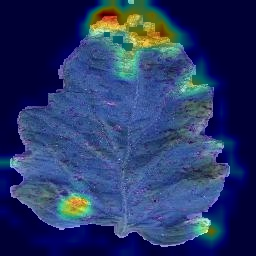

In [ ]:
heatmap_plus = grad_cam_plus(model, img)
show_imgwithheat(img_path, heatmap_plus)

In [ ]:
img_path = '/content/three.JPG'
img = preprocess_image(img_path)

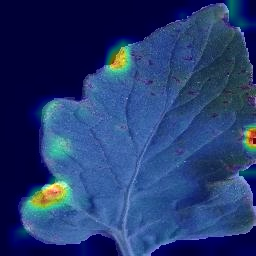

In [ ]:
heatmap_plus = grad_cam_plus(model, img)
show_imgwithheat(img_path, heatmap_plus)

In [ ]:
img_path = '/content/threee.JPG'
img = preprocess_image(img_path)

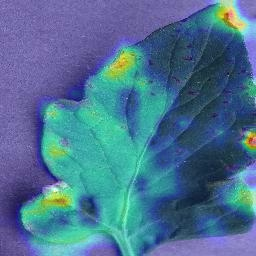

In [ ]:
heatmap_plus = grad_cam_plus(model, img)
show_imgwithheat(img_path, heatmap_plus)

In [ ]:
img_path = '/content/tbspotval29.JPG'
img = preprocess_image(img_path)

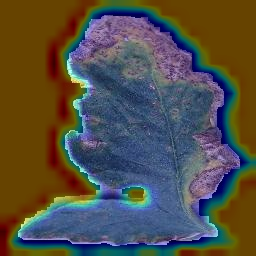

In [ ]:
heatmap_plus = grad_cam_plus(model, img)
show_imgwithheat(img_path, heatmap_plus)

## Comparison of GradCam & GradCam++ (single image & 1 batch of image)

### GradCam

#### RIS

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import scipy.stats as stats
from skimage.util import random_noise
from skimage.transform import rotate, resize
import random

In [ ]:
# Function to create GradCam heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Define the GradCam model
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients and activation outputs
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# # Define some perturbation functions
# def add_noise(image, noise_level=0.05):
#     return random_noise(image, var=noise_level)

# def rotate_image(image, angle):
#     return rotate(image, angle, resize=False, preserve_range=True)

# def resize_image(image, scale):
#     # Resizes the image to scale, filling with nearest values
#     new_size = tuple(int(x * scale) for x in image.shape[:2])
#     return resize(image, new_size, preserve_range=True, anti_aliasing=True, mode='reflect')

# Define perturbations to apply to the image
def add_noise(image, noise_level=0.1):
    perturbed_image = random_noise(image, var=noise_level)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def rotate_image(image, angle):
    perturbed_image = rotate(image, angle)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def resize_image(image, scale):
    perturbed_image = resize(image, (int(224 * scale), int(224 * scale), 3), preserve_range=True)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def translate_image(image, shift):
    # Translate image without changing its shape (shifting pixels)
    translation_matrix = np.float32([[1, 0, shift], [0, 1, shift]])
    return cv2.warpAffine(image, translation_matrix, image.shape[:2])

# Preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img


In [ ]:
# Base image
img_path = '/content/one.JPG'
single_image = preprocess_image(img_path)
img_array = np.expand_dims(single_image, axis=0)

In [ ]:
# Generate the base GradCam heatmap
last_conv_layer_name = 'max_pooling2d_2'  # Change to your model's last convolutional layer
base_gradcam = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

In [ ]:
# Define perturbations to apply
perturbations = [
    lambda img: add_noise(img, noise_level=0.05),
    lambda img: rotate_image(img, 15),
    lambda img: resize_image(img, 0.95),  # Slightly shrink the image
    # lambda img: translate_image(img, 5),  # Slightly shrink the image
]

# Generate GradCam heatmaps for perturbed images
perturbed_gradcam_heatmaps = []

for perturb in perturbations:
    perturbed_image = perturb(single_image)
    perturbed_image = np.expand_dims(perturbed_image, axis=0)  # Reshape for GradCam input
    perturbed_gradcam = make_gradcam_heatmap(perturbed_image, model, last_conv_layer_name)
    perturbed_gradcam_heatmaps.append(perturbed_gradcam)

In [ ]:
# Measure RIS with Kendall's Tau
ris_scores = []

for perturbed_gradcam in perturbed_gradcam_heatmaps:
    # Flatten both heatmaps for rank correlation
    base_flat = base_gradcam.flatten()
    perturb_flat = perturbed_gradcam.flatten()

    # Calculate Kendall's Tau
    tau, _ = stats.kendalltau(base_flat, perturb_flat)

    # Add to RIS scores
    ris_scores.append(tau)

# Compute the mean RIS score
mean_ris_score = np.mean(ris_scores)

print(f"Relative Input Stability (RIS) Score for GradCam: {mean_ris_score:.2f}")

Relative Input Stability (RIS) Score for GradCam: 0.34


#### RRS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import clone_model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import DictVectorizer

In [ ]:
# Apply dropout to model layers
def apply_dropout(model, dropout_rate=0.5):
    new_model = clone_model(model)
    new_model.set_weights(model.get_weights())

    for layer in new_model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            layer.rate = dropout_rate
    return new_model

# GradCam function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap

In [ ]:
# Preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

In [ ]:
# Perturb the model by changing dropout rates
perturbed_models = [
    apply_dropout(loaded_model, dropout_rate=0.3),
    apply_dropout(loaded_model, dropout_rate=0.7),
]

# Base image
img_path = '/content/one.JPG'
single_image = preprocess_image(img_path)
img_array = np.expand_dims(single_image, axis=0)  # Ensure correct shape
last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer
base_heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

In [ ]:
# Generate heatmaps for the perturbed models
perturbed_heatmaps = []
for perturbed_model in perturbed_models:
    perturbed_heatmap = make_gradcam_heatmap(img_array, perturbed_model, last_conv_layer_name)
    perturbed_heatmaps.append(perturbed_heatmap)

import numpy as np
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity for heatmaps
def calculate_cosine_similarity(base_heatmap, perturbed_heatmaps):
    # Ensure conversion to NumPy arrays
    base_vector = base_heatmap.numpy().reshape(-1)  # Convert to NumPy and flatten
    similarities = []
    for perturbed_heatmap in perturbed_heatmaps:
        perturbed_vector = perturbed_heatmap.numpy().reshape(-1)  # Convert and flatten
        similarity = cosine_similarity([base_vector], [perturbed_vector])[0][0]
        similarities.append(similarity)
    return similarities


# Calculate cosine similarity for the heatmaps
cosine_similarities = calculate_cosine_similarity(base_heatmap, perturbed_heatmaps)

# Compute the mean RRS score
mean_rrs_score = np.mean(cosine_similarities)

print(f"Relative Representation Stability (RRS) Score for GradCam: {mean_rrs_score:.2f}")


Relative Representation Stability (RRS) Score for GradCam: 1.00


#### PGI & PGU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from sklearn.metrics.pairwise import cosine_similarity
from skimage.util import random_noise
from skimage.transform import rotate, resize


# Preprocessing function
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img


# GradCAM function to generate heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute gradients
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=5):
    # Get the top k important indices from the heatmap
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features with boundary check
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0  # Set to constant value

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=5):
    # Get the top k unimportant indices from the heatmap
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features with boundary check
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0  # Set to constant value

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)

In [ ]:
# Example of calculating PGI and PGU for GradCAM
single_image = preprocess_image("/content/one.JPG", target_size=(224, 224))
img_array = np.expand_dims(single_image, axis=0)  # Ensure correct shape
last_conv_layer_name = "max_pooling2d_2"  # Adjust based on your model architecture
gradcam_heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

In [ ]:
pgi_gradcam = calculate_pgi(gradcam_heatmap, single_image, loaded_model, k=100)
print(f"PGI for GradCAM: {np.mean(pgi_gradcam):.5f}")

PGI for GradCAM: 0.01737


In [ ]:
pgu_gradcam = calculate_pgu(gradcam_heatmap, single_image, loaded_model, k=100)
print(f"PGU for GradCAM: {np.mean(pgu_gradcam):.5f}")

PGU for GradCAM: 0.00693


In [ ]:
pgi_gradcam = calculate_pgi(gradcam_heatmap, single_image, loaded_model, k=200)
print(f"PGI for GradCAM: {np.mean(pgi_gradcam):.5f}")

PGI for GradCAM: 0.08074


In [ ]:
pgu_gradcam = calculate_pgu(gradcam_heatmap, single_image, loaded_model, k=200)
print(f"PGU for GradCAM: {np.mean(pgu_gradcam):.5f}")

PGU for GradCAM: 0.01932


#### Inconsistency

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.stats import entropy
from skimage.util import random_noise
from skimage.transform import rotate, resize
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Define GradCam function
def make_gradcam_heatmap(model, img, last_conv_layer_name, category_id=None):
    img_tensor = np.expand_dims(img, axis=0)
    conv_layer = model.get_layer(last_conv_layer_name)
    gradcam_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = gradcam_model(img_tensor)
        if category_id is None:
            category_id = np.argmax(predictions[0])
        class_channel = predictions[:, category_id]

        grads = tape.gradient(class_channel, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output = conv_output[0]
    weighted_output = conv_output @ pooled_grads[..., None]
    heatmap = tf.reduce_mean(weighted_output, axis=-1)  # Taking mean to get heatmap

    # Normalize heatmap
    heatmap = np.maximum(heatmap, 0)
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)

    return heatmap


# Function to calculate L1 distance between GradCam heatmaps
def calculate_l1_distance_gradcam(heatmap1, heatmap2):
    return np.sum(np.abs(heatmap1 - heatmap2))  # L1 distance


# Base image
img_path = '/content/one.JPG'
image_to_explain = preprocess_image(img_path)

# GradCam settings
last_conv_layer_name = 'max_pooling2d_2'  # Change to your model's last convolutional layer
base_gradcam_heatmap = make_gradcam_heatmap(loaded_model, image_to_explain, last_conv_layer_name)

# Generate multiple GradCam heatmaps with different seeds
num_explanations = 10  # Number of explanations to generate
gradcam_heatmaps = [base_gradcam_heatmap]

for seed in range(1, num_explanations):
    tf.random.set_seed(seed)
    perturbed_gradcam_heatmap = make_gradcam_heatmap(loaded_model, image_to_explain, last_conv_layer_name)
    gradcam_heatmaps.append(perturbed_gradcam_heatmap)

# Calculate L1 distance between the base and each perturbed heatmap
inconsistencies = [calculate_l1_distance_gradcam(base_gradcam_heatmap, hm) for hm in gradcam_heatmaps[1:]]

# Calculate the average inconsistency for GradCam
mean_inconsistency_gradcam = np.mean(inconsistencies)
print(f"Inconsistency for GradCam: {mean_inconsistency_gradcam:.6f}")

Inconsistency for GradCam: 0.000000


### GradCam++

#### RIS

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

In [ ]:
# Preprocessing function
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

# Define some perturbation functions
def add_noise(image, noise_level=0.1):
    return random_noise(image, var=noise_level)

def rotate_image(image, angle):
    return rotate(image, angle)

def resize_image(image, scale):
    perturbed_image = resize(image, (int(224 * scale), int(224 * scale), 3), preserve_range=True)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

In [ ]:
# Define perturbations to apply to the image
perturbations = [
    lambda img: add_noise(img, noise_level=0.05),
    lambda img: rotate_image(img, 15),
    lambda img: resize_image(img, 0.95),
]

# Base image
img_path = '/content/one.JPG'
single_image = preprocess_image(img_path)

In [ ]:
# GradCam++ settings
last_conv_layer_name = 'max_pooling2d_2'  # Change to your model's last convolutional layer
base_gradcam = grad_cam_plus(model, single_image, last_conv_layer_name)

# Generate perturbed GradCam++ heatmaps
perturbed_gradcam_heatmaps = []

for perturb in perturbations:
    perturbed_image = perturb(single_image)
    # perturbed_array = np.expand_dims(perturbed_image, axis=0)  # Ensure correct shape
    perturbed_gradcam = grad_cam_plus(model, perturbed_image)
    perturbed_gradcam_heatmaps.append(perturbed_gradcam)

# Measure RIS with Kendall's Tau
ris_scores = []

for perturbed_gradcam in perturbed_gradcam_heatmaps:
    # Flatten both heatmaps for rank correlation
    base_flat = base_gradcam.flatten()
    perturb_flat = perturbed_gradcam.flatten()

    # Calculate Kendall's Tau for rank correlation
    tau, _ = stats.kendalltau(base_flat, perturb_flat)

    # Add to RIS scores
    ris_scores.append(tau)

# Compute the mean RIS score
mean_ris_score = np.mean(ris_scores)

print(f"Relative Input Stability (RIS) Score for GradCam++: {mean_ris_score:.2f}")


Relative Input Stability (RIS) Score for GradCam++: 0.46


#### RRS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import clone_model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import DictVectorizer
from tensorflow.keras.preprocessing import image

In [ ]:
# Preprocessing function
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

# Apply dropout to model layers
def apply_dropout(model, dropout_rate=0.5):
    new_model = clone_model(model)
    new_model.set_weights(model.get_weights())

    for layer in new_model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            layer.rate = dropout_rate
    return new_model

def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Define a function to calculate cosine similarity for heatmaps
def calculate_cosine_similarity(base_heatmap, perturbed_heatmaps):
    base_vector = base_heatmap.reshape(-1)  # Flatten the base heatmap
    similarities = []
    for perturbed_heatmap in perturbed_heatmaps:
        perturbed_vector = perturbed_heatmap.reshape(-1)  # Flatten perturbed heatmaps
        similarity = cosine_similarity([base_vector], [perturbed_vector])[0][0]
        similarities.append(similarity)
    return similarities

In [ ]:
# Base image
img_path = '/content/one.JPG'
img_array = preprocess_image(img_path, target_size=(224, 224))
last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer
base_heatmap = grad_cam_plus(loaded_model, img_array, layer_name=last_conv_layer_name)

In [ ]:
# Generate heatmaps for perturbed models
perturbed_models = [
    apply_dropout(model, dropout_rate=0.3),
    apply_dropout(model, dropout_rate=0.7),
]

perturbed_heatmaps = []
for perturbed_model in perturbed_models:
    perturbed_heatmap = grad_cam_plus(perturbed_model, img_array, "max_pooling2d_2")  # Adjust the layer name
    perturbed_heatmaps.append(perturbed_heatmap)

# Calculate cosine similarity and compute the mean RRS score
cosine_similarities = calculate_cosine_similarity(base_heatmap, perturbed_heatmaps)
mean_rrs_score = np.mean(cosine_similarities)

print(f"Relative Representation Stability (RRS) Score for GradCam++: {mean_rrs_score:.2f}")

Relative Representation Stability (RRS) Score for GradCam++: 1.00


#### PGI & PGU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image

# Preprocessing function
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img /= 255
    return img

def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=5):
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features with boundary checks
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0  # Set to constant value (e.g., black)

    # Calculate prediction gap
    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))

    # Return the absolute change in prediction probability
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=5):
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features with boundary checks
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0  # Set to constant value (e.g., black)

    # Calculate prediction gap
    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))

    # Return the absolute change in prediction probability
    return np.abs(original_prediction - perturbed_prediction)

In [ ]:
# Base image
img_path = '/content/one.JPG'
img_array = preprocess_image(img_path, target_size=(224, 224))
last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer
gradcam_plus_heatmap = grad_cam_plus(loaded_model, img_array, layer_name=last_conv_layer_name)

In [ ]:
# Calculate PGI and PGU for GradCam++
pgi_gradcam_plus = calculate_pgi(gradcam_plus_heatmap, img_array, loaded_model, k=5)
pgu_gradcam_plus = calculate_pgu(gradcam_plus_heatmap, img_array, loaded_model, k=5)

print(f"PGI for GradCam++: {np.mean(pgi_gradcam_plus):.5f}")
print(f"PGU for GradCam++: {np.mean(pgu_gradcam_plus):.5f}")

PGI for GradCam++: 0.00008
PGU for GradCam++: 0.00014


In [ ]:
# Calculate PGI and PGU for GradCam++
pgi_gradcam_plus = calculate_pgi(gradcam_plus_heatmap, img_array, loaded_model, k=100)
pgu_gradcam_plus = calculate_pgu(gradcam_plus_heatmap, img_array, loaded_model, k=100)

print(f"PGI for GradCam++: {np.mean(pgi_gradcam_plus):.5f}")
print(f"PGU for GradCam++: {np.mean(pgu_gradcam_plus):.5f}")

PGI for GradCam++: 0.00618
PGU for GradCam++: 0.01042


In [ ]:
# Calculate PGI and PGU for GradCam++
pgi_gradcam_plus = calculate_pgi(gradcam_plus_heatmap, img_array, loaded_model, k=200)
pgu_gradcam_plus = calculate_pgu(gradcam_plus_heatmap, img_array, loaded_model, k=200)

print(f"PGI for GradCam++: {np.mean(pgi_gradcam_plus):.5f}")
print(f"PGU for GradCam++: {np.mean(pgu_gradcam_plus):.5f}")

PGI for GradCam++: 0.04647
PGU for GradCam++: 0.01625


#### Inconsistency

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.stats import entropy
from skimage.util import random_noise
from skimage.transform import rotate, resize
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Define GradCam++ function
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_5", category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    # Calculate GradCam++ weights
    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0] * 2.0 + conv_third_grad[0] * global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num / alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0, 1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)
    deep_linearization_weights = np.sum(weights * alphas, axis=(0, 1))

    # Compute the GradCam++ heatmap
    grad_cam_map = np.sum(deep_linearization_weights * conv_output[0], axis=2)
    heatmap = np.maximum(grad_cam_map, 0)
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)

    return heatmap


# Function to calculate L1 distance between GradCam++ heatmaps
def calculate_l1_distance(heatmap1, heatmap2):
    return np.sum(np.abs(heatmap1 - heatmap2))  # L1 distance


# Base image
img_path = '/content/one.JPG'
image_to_explain = preprocess_image(img_path)

# Generate the base GradCam++ heatmap
last_conv_layer_name = "max_pooling2d_2"  # Adjust to your model's last convolutional layer
base_gradcam_plus = grad_cam_plus(loaded_model, image_to_explain, last_conv_layer_name)

# Generate multiple GradCam++ heatmaps with different seeds
gradcam_plus_heatmaps = [base_gradcam_plus]

for seed in range(1, 11):  # Generate 10 additional explanations with different seeds
    tf.random.set_seed(seed)
    perturbed_gradcam_plus = grad_cam_plus(loaded_model, image_to_explain, last_conv_layer_name)
    gradcam_plus_heatmaps.append(perturbed_gradcam_plus)

# Measure inconsistency using L1 distance
inconsistencies = [calculate_l1_distance(base_gradcam_plus, heatmap) for heatmap in gradcam_plus_heatmaps[1:]]

# Calculate the mean inconsistency
mean_inconsistency = np.mean(inconsistencies)

print(f"Inconsistency for GradCam++: {mean_inconsistency:.6f}")

Inconsistency for GradCam++: 0.000000


### GradCam Multiple images

#### RIS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats

# Define perturbations to apply to the image
def add_noise(image, noise_level=0.1):
    perturbed_image = random_noise(image, var=noise_level)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def rotate_image(image, angle):
    perturbed_image = rotate(image, angle)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def resize_image(image, scale):
    perturbed_image = resize(image, (int(224 * scale), int(224 * scale), 3), preserve_range=True)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)
# aau = 0
# Function to create GradCam heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0)
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)
    # global aau
    # aau = aau + 1
    # print(f"hi {aau}")
    return heatmap.numpy()

# Generate RIS for multiple images and calculate average
last_conv_layer_name = 'max_pooling2d_2'  # Change to your model's last convolutional layer
ris_scores = []


perturbations = [
    lambda img: add_noise(img, noise_level=0.05),
    lambda img: rotate_image(img, 15),
    lambda img: resize_image(img, 0.95),  # Slightly shrink the image
    # lambda img: translate_image(img, 5),  # Slightly shrink the image
]

# Loop through a subset of images in the validation generator
num_samples = 32  # Adjust this to the number of samples to evaluate
for i in range(num_samples):
    # Get an image from the validation generator
    image_to_explain = validation_generator[1][0][i]  # Adjust for your generator

    # Get the base GradCam heatmap
    base_gradcam = make_gradcam_heatmap(image_to_explain[None, :], model, last_conv_layer_name)

    # Apply perturbations to generate perturbed GradCam heatmaps
    perturbed_gradcam_heatmaps = []

    for perturb in perturbations:
        perturbed_image = perturb(image_to_explain)
        perturbed_gradcam = make_gradcam_heatmap(perturbed_image[None, :], model, last_conv_layer_name)
        perturbed_gradcam_heatmaps.append(perturbed_gradcam)

    ris_scores_single_image = []
    # Measure RIS with Kendall's Tau
    for perturbed_gradcam in perturbed_gradcam_heatmaps:
        base_flat = base_gradcam.flatten()
        perturb_flat = perturbed_gradcam.flatten()

        tau, _ = stats.kendalltau(base_flat, perturb_flat)
        ris_scores_single_image.append(tau)
    mean_ris_scores_single_image = np.mean(ris_scores_single_image)
    ris_scores.append(mean_ris_scores_single_image)

# Compute the mean RIS score for the dataset
mean_ris_score = np.mean(ris_scores)

print(f"Average Relative Input Stability (RIS) Score: {mean_ris_score:.2f}")


Average Relative Input Stability (RIS) Score: 0.26


#### RRS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import clone_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from skimage.util import random_noise
from skimage.transform import rotate
import scipy.stats as stats


# Function to create a heatmap with GradCam
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()


# Apply dropout to a model to create perturbed versions
def apply_dropout(model, dropout_rate=0.5):
    new_model = clone_model(model)
    new_model.set_weights(model.get_weights())
    for layer in new_model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            layer.rate = dropout_rate
    return new_model


# Function to calculate cosine similarity between heatmaps
def calculate_cosine_similarity(base_heatmap, perturbed_heatmaps):
    base_vector = base_heatmap.reshape(-1)  # Flatten the heatmap
    similarities = []
    for perturbed_heatmap in perturbed_heatmaps:
        perturbed_vector = perturbed_heatmap.reshape(-1)  # Flatten
        similarity = cosine_similarity([base_vector], [perturbed_vector])[0][0]
        similarities.append(similarity)
    return similarities


# Generate RRS for multiple images and calculate the average
last_conv_layer_name = 'max_pooling2d_8'  # Change to your model's last convolutional layer
rrs_scores = []

# Loop through a subset of images in the validation generator
num_samples = 32  # Number of samples to evaluate
for i in range(num_samples):
    # Get an image from the validation generator
    image_to_explain = validation_generator[1][0][i]  # Adjust for your generator
    img_array = np.expand_dims(image_to_explain, axis=0)  # Ensure correct shape

    # Create the base GradCam heatmap
    base_heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

    # Perturb the model to get different GradCam heatmaps
    perturbed_models = [
        apply_dropout(loaded_model, dropout_rate=0.3),
        apply_dropout(loaded_model, dropout_rate=0.7),
    ]

    perturbed_heatmaps = []

    for perturbed_model in perturbed_models:
        perturbed_heatmap = make_gradcam_heatmap(img_array, perturbed_model, last_conv_layer_name)
        perturbed_heatmaps.append(perturbed_heatmap)

    # Calculate cosine similarity for RRS
    cosine_similarities = calculate_cosine_similarity(base_heatmap, perturbed_heatmaps)

    # Compute the average cosine similarity
    rrs_score = np.mean(cosine_similarities)

    rrs_scores.append(rrs_score)  # Add to the list of RRS scores

# Compute the mean RRS score for the dataset
mean_rrs_score = np.mean(rrs_scores)

print(f"Average Relative Representation Stability (RRS) Score for GradCam: {mean_rrs_score:.2f}")


Average Relative Representation Stability (RRS) Score for GradCam: 1.00


#### PGI & PGU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats


# GradCam function to generate heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute gradients and the heatmap
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=25):
    # Get the top k important indices from the heatmap
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=25):
    # Get the top k unimportant indices from the heatmap
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Loop over multiple images in the validation generator to calculate PGI and PGU
pgi_scores = []
pgu_scores = []
num_samples = 32  # Number of samples to evaluate

for i in range(num_samples):
    image_array = validation_generator[3][0][i]  # Get an image from the validation generator
    img_array = np.expand_dims(image_array, axis=0)  # Ensure correct shape

    # Generate the GradCam heatmap
    last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
    heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

    # Calculate PGI and PGU
    pgi = calculate_pgi(heatmap, image_array, loaded_model, k=25)
    pgu = calculate_pgu(heatmap, image_array, loaded_model, k=25)

    # Store the mean PGI and PGU
    pgi_scores.append(np.mean(pgi))
    pgu_scores.append(np.mean(pgu))

# Calculate the average PGI and PGU for GradCam
average_pgi = np.mean(pgi_scores)
average_pgu = np.mean(pgu_scores)

print(f"Average PGI for GradCam: {average_pgi:.5f}")
print(f"Average PGU for GradCam: {average_pgu:.5f}")


Average PGI for GradCam: 0.00846
Average PGU for GradCam: 0.00974


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats


# GradCam function to generate heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute gradients and the heatmap
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=25):
    # Get the top k important indices from the heatmap
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=25):
    # Get the top k unimportant indices from the heatmap
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Loop over multiple images in the validation generator to calculate PGI and PGU
pgi_scores = []
pgu_scores = []
num_samples = 10  # Number of samples to evaluate

for i in range(num_samples):
    image_array = validation_generator[1][0][i]  # Get an image from the validation generator
    img_array = np.expand_dims(image_array, axis=0)  # Ensure correct shape

    # Generate the GradCam heatmap
    last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
    heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

    # Calculate PGI and PGU
    pgi = calculate_pgi(heatmap, image_array, loaded_model, k=100)
    pgu = calculate_pgu(heatmap, image_array, loaded_model, k=100)

    # Store the mean PGI and PGU
    pgi_scores.append(np.mean(pgi))
    pgu_scores.append(np.mean(pgu))

# Calculate the average PGI and PGU for GradCam
average_pgi = np.mean(pgi_scores)
average_pgu = np.mean(pgu_scores)

print(f"Average PGI for GradCam: {average_pgi:.5f}")
print(f"Average PGU for GradCam: {average_pgu:.5f}")


Average PGI for GradCam: 0.02195
Average PGU for GradCam: 0.01834


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats


# GradCam function to generate heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute gradients and the heatmap
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=25):
    # Get the top k important indices from the heatmap
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=25):
    # Get the top k unimportant indices from the heatmap
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Loop over multiple images in the validation generator to calculate PGI and PGU
pgi_scores = []
pgu_scores = []
num_samples = 32  # Number of samples to evaluate

for i in range(num_samples):
    image_array = validation_generator[1][0][i]  # Get an image from the validation generator
    img_array = np.expand_dims(image_array, axis=0)  # Ensure correct shape

    # Generate the GradCam heatmap
    last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
    heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

    # Calculate PGI and PGU
    pgi = calculate_pgi(heatmap, image_array, loaded_model, k=200)
    pgu = calculate_pgu(heatmap, image_array, loaded_model, k=200)

    # Store the mean PGI and PGU
    pgi_scores.append(np.mean(pgi))
    pgu_scores.append(np.mean(pgu))

# Calculate the average PGI and PGU for GradCam
average_pgi = np.mean(pgi_scores)
average_pgu = np.mean(pgu_scores)

print(f"Average PGI for GradCam: {average_pgi:.5f}")
print(f"Average PGU for GradCam: {average_pgu:.5f}")


Average PGI for GradCam: 0.07501
Average PGU for GradCam: 0.05354


#### Inconsistency

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.stats import entropy
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize

# GradCam function to generate heatmap
def make_gradcam_heatmap(model, img, last_conv_layer_name, category_id=None):
    img_tensor = np.expand_dims(img, axis=0)
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, preds = grad_model(img_tensor)
        if category_id is None:
            category_id = tf.argmax(preds[0])
        class_channel = preds[:, category_id]

        grads = tape.gradient(class_channel, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = conv_output[0]
    weighted_output = last_conv_layer_output @ pooled_grads[..., None]
    heatmap = tf.reduce_mean(weighted_output, axis=-1)  # Mean to get heatmap

    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)  # Normalize
    return heatmap


# Function to calculate L1 distance between GradCam heatmaps
def calculate_l1_distance(heatmap1, heatmap2):
    return np.sum(np.abs(heatmap1 - heatmap2))  # L1 distance


# Calculate average inconsistency for multiple images
inconsistency_scores = []
num_samples = 32  # Number of samples to evaluate

for i in range(num_samples):
    # Get an image from the validation generator
    image_array = validation_generator[1][0][i]  # Get the image from the generator
    last_conv_layer_name = "max_pooling2d_2"  # Adjust based on your model's architecture

    # Generate the base GradCam heatmap
    base_gradcam_heatmap = make_gradcam_heatmap(loaded_model, image_array, last_conv_layer_name)

    # Generate multiple GradCam heatmaps with different seeds for the same image
    num_explanations = 10  # Number of explanations to generate
    gradcam_heatmaps = [base_gradcam_heatmap]

    for seed in range(1, num_explanations):
        tf.random.set_seed(seed)
        perturbed_heatmap = make_gradcam_heatmap(loaded_model, image_array, last_conv_layer_name)
        gradcam_heatmaps.append(perturbed_heatmap)

    # Calculate L1 distance between the base and each perturbed heatmap
    inconsistencies = [calculate_l1_distance(base_gradcam_heatmap, hm) for hm in gradcam_heatmaps[1:]]

    # Calculate the mean inconsistency for this image
    mean_inconsistency = np.mean(inconsistencies)

    # Store the mean inconsistency
    inconsistency_scores.append(mean_inconsistency)

# Calculate the average inconsistency across all images
average_inconsistency = np.mean(inconsistency_scores)

print(f"Average Inconsistency for GradCam: {average_inconsistency:.6f}")


Average Inconsistency for GradCam: 0.000000


### GradCam++ Multiple images

#### RIS

In [ ]:
import numpy as np
import tensorflow as tf
import scipy.stats as stats
from tensorflow.keras.models import Model
from skimage.util import random_noise
from skimage.transform import rotate, resize


# Function to create a heatmap with GradCam++
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap


# Preprocessing function
def preprocess_image(img):
    img = img / 255  # Normalize the image
    return img


# Define perturbations to apply to the image
def add_noise(image, noise_level=0.05):
    return random_noise(image, var=noise_level)

def rotate_image(image, angle):
    return rotate(image, angle)

def resize_image(image, scale):
    perturbed_image = resize(image, (int(224 * scale), int(224 * scale), 3), preserve_range=True)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)


# Function to calculate RIS for multiple images
def calculate_average_ris(validation_generator, last_conv_layer_name, num_samples=32):
    ris_scores = []

    for i in range(num_samples):
        # Get an image from the validation generator
        base_image = validation_generator[1][0][i]  # Get the first image from the generator
        # base_image = preprocess_image(image_array)

        # Generate base GradCam++ heatmap
        base_gradcam = grad_cam_plus(loaded_model, base_image, last_conv_layer_name)

        # Apply perturbations and generate heatmaps
        perturbations = [
            lambda img: add_noise(img, noise_level=0.05),
            lambda img: rotate_image(img, 15),
            lambda img: resize_image(img, 0.95),
        ]

        perturbed_gradcam_heatmaps = []
        for perturb in perturbations:
            perturbed_image = perturb(base_image)
            perturbed_gradcam = grad_cam_plus(loaded_model, perturbed_image, last_conv_layer_name)
            perturbed_gradcam_heatmaps.append(perturbed_gradcam)

        # Calculate RIS using Kendall's Tau
        ris_sample_scores = []
        base_flat = base_gradcam.flatten()

        for perturbed_gradcam in perturbed_gradcam_heatmaps:
            perturb_flat = perturbed_gradcam.flatten()
            tau, _ = stats.kendalltau(base_flat, perturb_flat)
            ris_sample_scores.append(tau)

        ris_scores.append(np.mean(ris_sample_scores))

    # Compute the average RIS across all samples
    return np.mean(ris_scores)


# Compute average RIS
last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
average_ris = calculate_average_ris(validation_generator, last_conv_layer_name, num_samples=32)

print(f"Average RIS for GradCam++: {average_ris:.2f}")


Average RIS for GradCam++: 0.33


#### RRS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, clone_model
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image

# Function to apply dropout to model layers
def apply_dropout(model, dropout_rate=0.5):
    new_model = clone_model(model)
    new_model.set_weights(model.get_weights())
    for layer in new_model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            layer.rate = dropout_rate
    return new_model

# Function to generate GradCam++ heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate cosine similarity for heatmaps
def calculate_cosine_similarity(base_heatmap, perturbed_heatmaps):
    base_vector = base_heatmap.flatten()  # Flatten the base heatmap
    similarities = []
    for perturbed_heatmap in perturbed_heatmaps:
        perturbed_vector = perturbed_heatmap.flatten()  # Flatten perturbed heatmaps
        similarity = cosine_similarity([base_vector], [perturbed_vector])[0][0]
        similarities.append(similarity)
    return similarities

# Function to calculate average RRS across multiple images
def calculate_average_rrs(validation_generator, num_samples=32, dropout_rate=0.3):
    rrs_scores = []

    for i in range(num_samples):
        # Get an image from the validation generator
        image_array = validation_generator[1][0][i]  # Get the first image from the batch
        base_image = image_array / 255  # Normalize the image

        # Generate base GradCam++ heatmap
        last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer
        base_heatmap = grad_cam_plus(loaded_model, base_image, last_conv_layer_name)

        # Generate heatmaps for perturbed models with different dropout rates
        perturbed_models = [
            apply_dropout(loaded_model, dropout_rate=0.3),
            apply_dropout(loaded_model, dropout_rate=0.7),
        ]

        perturbed_heatmaps = []
        for perturbed_model in perturbed_models:
            perturbed_heatmap = grad_cam_plus(perturbed_model, base_image, last_conv_layer_name)
            perturbed_heatmaps.append(perturbed_heatmap)

        # Calculate cosine similarity and compute RRS for the current image
        cosine_similarities = calculate_cosine_similarity(base_heatmap, perturbed_heatmaps)
        mean_rrs = np.mean(cosine_similarities)

        rrs_scores.append(mean_rrs)

    # Compute the average RRS score across all samples
    return np.mean(rrs_scores)

# Compute average RRS score
average_rrs = calculate_average_rrs(validation_generator, num_samples=32)

print(f"Average RRS for GradCam++: {average_rrs:.2f}")


Average RRS for GradCam++: 1.00


#### PGI & PGU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image

# Preprocessing function
def preprocess_image(img_array):
    # Normalize the image
    img = img_array.astype(np.float32)
    img /= 255
    return img

# GradCam++ function to generate heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate PGI and PGU
def calculate_prediction_gap(heatmap, image, model, k=5, important=True):
    """Calculate prediction gap by perturbing features in the heatmap."""
    if important:
        # Important features: top k indices
        features = np.unravel_index(
            np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
        )
    else:
        # Unimportant features: bottom k indices
        features = np.unravel_index(
            np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
        )

    # Perturb the selected features
    perturbed_image = image.copy()
    for row, col in zip(features[0], features[1]):
        perturbed_image[row, col, :] = 0  # Set to black

    # Calculate prediction gap
    original_pred = model(np.expand_dims(image, axis=0))
    perturbed_pred = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_pred - perturbed_pred)

# Function to calculate average PGI and PGU over multiple images
def calculate_average_prediction_gap(validation_generator, num_samples=32, k=5):
    pgi_scores = []
    pgu_scores = []
    last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer

    for i in range(num_samples):
        # Get an image from the validation generator
        preprocessed_img = validation_generator[1][0][i]  # Get the first image from the batch
        # preprocessed_img = preprocess_image(img_array)

        # Generate GradCam++ heatmap
        gradcam_heatmap = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)

        # Calculate PGI and PGU
        pgi = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=True)
        pgu = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=False)

        pgi_scores.append(np.mean(pgi))
        pgu_scores.append(np.mean(pgu))

    # Return average PGI and PGU scores
    average_pgi = np.mean(pgi_scores)
    average_pgu = np.mean(pgu_scores)

    return average_pgi, average_pgu

# Calculate average PGI and PGU
avg_pgi, avg_pgu = calculate_average_prediction_gap(validation_generator, num_samples=32, k=25)

print(f"Average PGI for GradCam++: {avg_pgi:.5f}")
print(f"Average PGU for GradCam++: {avg_pgu:.5f}")


Average PGI for GradCam++: 0.00522
Average PGU for GradCam++: 0.00606


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image

# Preprocessing function
def preprocess_image(img_array):
    # Normalize the image
    img = img_array.astype(np.float32)
    img /= 255
    return img

# GradCam++ function to generate heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate PGI and PGU
def calculate_prediction_gap(heatmap, image, model, k=5, important=True):
    """Calculate prediction gap by perturbing features in the heatmap."""
    if important:
        # Important features: top k indices
        features = np.unravel_index(
            np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
        )
    else:
        # Unimportant features: bottom k indices
        features = np.unravel_index(
            np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
        )

    # Perturb the selected features
    perturbed_image = image.copy()
    for row, col in zip(features[0], features[1]):
        perturbed_image[row, col, :] = 0  # Set to black

    # Calculate prediction gap
    original_pred = model(np.expand_dims(image, axis=0))
    perturbed_pred = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_pred - perturbed_pred)

# Function to calculate average PGI and PGU over multiple images
def calculate_average_prediction_gap(validation_generator, num_samples=32, k=5):
    pgi_scores = []
    pgu_scores = []
    last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer

    for i in range(num_samples):
        # Get an image from the validation generator
        preprocessed_img = validation_generator[1][0][i]  # Get the first image from the batch
        # preprocessed_img = preprocess_image(img_array)

        # Generate GradCam++ heatmap
        gradcam_heatmap = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)

        # Calculate PGI and PGU
        pgi = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=True)
        pgu = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=False)

        pgi_scores.append(np.mean(pgi))
        pgu_scores.append(np.mean(pgu))

    # Return average PGI and PGU scores
    average_pgi = np.mean(pgi_scores)
    average_pgu = np.mean(pgu_scores)

    return average_pgi, average_pgu

# Calculate average PGI and PGU
avg_pgi, avg_pgu = calculate_average_prediction_gap(validation_generator, num_samples=32, k=100)

print(f"Average PGI for GradCam++: {avg_pgi:.5f}")
print(f"Average PGU for GradCam++: {avg_pgu:.5f}")


Average PGI for GradCam++: 0.03624
Average PGU for GradCam++: 0.01407


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image

# Preprocessing function
def preprocess_image(img_array):
    # Normalize the image
    img = img_array.astype(np.float32)
    img /= 255
    return img

# GradCam++ function to generate heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate PGI and PGU
def calculate_prediction_gap(heatmap, image, model, k=5, important=True):
    """Calculate prediction gap by perturbing features in the heatmap."""
    if important:
        # Important features: top k indices
        features = np.unravel_index(
            np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
        )
    else:
        # Unimportant features: bottom k indices
        features = np.unravel_index(
            np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
        )

    # Perturb the selected features
    perturbed_image = image.copy()
    for row, col in zip(features[0], features[1]):
        perturbed_image[row, col, :] = 0  # Set to black

    # Calculate prediction gap
    original_pred = model(np.expand_dims(image, axis=0))
    perturbed_pred = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_pred - perturbed_pred)

# Function to calculate average PGI and PGU over multiple images
def calculate_average_prediction_gap(validation_generator, num_samples=32, k=5):
    pgi_scores = []
    pgu_scores = []
    last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer

    for i in range(num_samples):
        # Get an image from the validation generator
        preprocessed_img = validation_generator[1][0][i]  # Get the first image from the batch
        # preprocessed_img = preprocess_image(img_array)

        # Generate GradCam++ heatmap
        gradcam_heatmap = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)

        # Calculate PGI and PGU
        pgi = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=True)
        pgu = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=False)

        pgi_scores.append(np.mean(pgi))
        pgu_scores.append(np.mean(pgu))

    # Return average PGI and PGU scores
    average_pgi = np.mean(pgi_scores)
    average_pgu = np.mean(pgu_scores)

    return average_pgi, average_pgu

# Calculate average PGI and PGU
avg_pgi, avg_pgu = calculate_average_prediction_gap(validation_generator, num_samples=32, k=200)

print(f"Average PGI for GradCam++: {avg_pgi:.5f}")
print(f"Average PGU for GradCam++: {avg_pgu:.5f}")


Average PGI for GradCam++: 0.07519
Average PGU for GradCam++: 0.02719


#### Inconsistency

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Define GradCam++ function
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap


# Function to calculate L1 distance between heatmaps
def calculate_l1_distance(heatmap1, heatmap2):
    return np.sum(np.abs(heatmap1 - heatmap2))


# Function to calculate inconsistency for multiple images from a validation generator
def calculate_inconsistency(validation_generator, num_samples=10):
    inconsistencies = []
    last_conv_layer_name = "max_pooling2d_2"  # Adjust to your model's last convolutional layer

    for i in range(num_samples):
        preprocessed_img = validation_generator[1][0][i]  # First image from the batch

        # Generate the base GradCam++ heatmap
        base_gradcam_plus = grad_cam_plus(loaded_model, preprocessed_img, layer_name=last_conv_layer_name)

        # Generate multiple GradCam++ heatmaps with different seeds
        gradcam_plus_heatmaps = [base_gradcam_plus]

        for seed in range(1, 11):
            tf.random.set_seed(seed)
            perturbed_gradcam_plus = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)
            gradcam_plus_heatmaps.append(perturbed_gradcam_plus)

        # Calculate L1 distances to measure inconsistency
        inconsistencies_for_img = [
            calculate_l1_distance(base_gradcam_plus, heatmap) for heatmap in gradcam_plus_heatmaps[1:]
        ]

        # Average inconsistency for this image
        avg_inconsistency_for_img = np.mean(inconsistencies_for_img)
        inconsistencies.append(avg_inconsistency_for_img)

    # Calculate the mean inconsistency over all images
    mean_inconsistency = np.mean(inconsistencies)
    return mean_inconsistency


# Example of using a validation generator to compute inconsistency
mean_inconsistency = calculate_inconsistency(validation_generator, num_samples=32)
print(f"Average Inconsistency for GradCam++: {mean_inconsistency:.6f}")


Average Inconsistency for GradCam++: 0.000000


## Comparison of GradCam & GradCam++ (200 images)

### GradCam Multiple images

#### RIS

##### 256 images

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats

# Define perturbations to apply to the image
def add_noise(image, noise_level=0.1):
    perturbed_image = random_noise(image, var=noise_level)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def rotate_image(image, angle):
    perturbed_image = rotate(image, angle)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def resize_image(image, scale):
    perturbed_image = resize(image, (int(224 * scale), int(224 * scale), 3), preserve_range=True)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)
# aau = 0
# Function to create GradCam heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0)
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)
    # global aau
    # aau = aau + 1
    # print(f"hi {aau}")
    return heatmap.numpy()

# Generate RIS for multiple images and calculate average
last_conv_layer_name = 'max_pooling2d_2'  # Change to your model's last convolutional layer
ris_scores = []


perturbations = [
    lambda img: add_noise(img, noise_level=0.05),
    lambda img: rotate_image(img, 15),
    lambda img: resize_image(img, 0.95),  # Slightly shrink the image
    # lambda img: translate_image(img, 5),  # Slightly shrink the image
]

# Loop through a subset of images in the validation generator
num_samples = 32  # Adjust this to the number of samples to evaluate
num_batches = 8
for i in range(num_batches):
  for j in range(num_samples):
    # Get an image from the validation generator
    image_to_explain = validation_generator[i][0][j]  # Adjust for your generator

    # Get the base GradCam heatmap
    base_gradcam = make_gradcam_heatmap(image_to_explain[None, :], model, last_conv_layer_name)

    # Apply perturbations to generate perturbed GradCam heatmaps
    perturbed_gradcam_heatmaps = []

    for perturb in perturbations:
        perturbed_image = perturb(image_to_explain)
        perturbed_gradcam = make_gradcam_heatmap(perturbed_image[None, :], model, last_conv_layer_name)
        perturbed_gradcam_heatmaps.append(perturbed_gradcam)

    ris_scores_single_image = []
    # Measure RIS with Kendall's Tau
    for perturbed_gradcam in perturbed_gradcam_heatmaps:
        base_flat = base_gradcam.flatten()
        perturb_flat = perturbed_gradcam.flatten()

        tau, _ = stats.kendalltau(base_flat, perturb_flat)
        ris_scores_single_image.append(tau)
    mean_ris_scores_single_image = np.mean(ris_scores_single_image)
    ris_scores.append(mean_ris_scores_single_image)

# Compute the mean RIS score for the dataset
mean_ris_score = np.mean(ris_scores)

print(f"Average Relative Input Stability (RIS) Score: {mean_ris_score:.2f}")


Average Relative Input Stability (RIS) Score: 0.23


##### 512

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats

# Define perturbations to apply to the image
def add_noise(image, noise_level=0.1):
    perturbed_image = random_noise(image, var=noise_level)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def rotate_image(image, angle):
    perturbed_image = rotate(image, angle)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)

def resize_image(image, scale):
    perturbed_image = resize(image, (int(224 * scale), int(224 * scale), 3), preserve_range=True)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)
# aau = 0
# Function to create GradCam heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0)
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)
    # global aau
    # aau = aau + 1
    # print(f"hi {aau}")
    return heatmap.numpy()

# Generate RIS for multiple images and calculate average
last_conv_layer_name = 'max_pooling2d_2'  # Change to your model's last convolutional layer
ris_scores = []


perturbations = [
    lambda img: add_noise(img, noise_level=0.05),
    lambda img: rotate_image(img, 15),
    lambda img: resize_image(img, 0.95),  # Slightly shrink the image
    # lambda img: translate_image(img, 5),  # Slightly shrink the image
]

# Loop through a subset of images in the validation generator
num_samples = 32  # Adjust this to the number of samples to evaluate
num_batches = 16
for i in range(num_batches):
  for j in range(num_samples):
    # Get an image from the validation generator
    image_to_explain = validation_generator[i][0][j]  # Adjust for your generator

    # Get the base GradCam heatmap
    base_gradcam = make_gradcam_heatmap(image_to_explain[None, :], model, last_conv_layer_name)

    # Apply perturbations to generate perturbed GradCam heatmaps
    perturbed_gradcam_heatmaps = []

    for perturb in perturbations:
        perturbed_image = perturb(image_to_explain)
        perturbed_gradcam = make_gradcam_heatmap(perturbed_image[None, :], model, last_conv_layer_name)
        perturbed_gradcam_heatmaps.append(perturbed_gradcam)

    ris_scores_single_image = []
    # Measure RIS with Kendall's Tau
    for perturbed_gradcam in perturbed_gradcam_heatmaps:
        base_flat = base_gradcam.flatten()
        perturb_flat = perturbed_gradcam.flatten()

        tau, _ = stats.kendalltau(base_flat, perturb_flat)
        ris_scores_single_image.append(tau)
    mean_ris_scores_single_image = np.mean(ris_scores_single_image)
    ris_scores.append(mean_ris_scores_single_image)

# Compute the mean RIS score for the dataset
mean_ris_score = np.mean(ris_scores)

print(f"Average Relative Input Stability (RIS) Score: {mean_ris_score:.2f}")


Average Relative Input Stability (RIS) Score: 0.43


#### RRS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import clone_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from skimage.util import random_noise
from skimage.transform import rotate
import scipy.stats as stats

# Apply dropout to model layers
def apply_dropout(model, dropout_rate=0.5):
    new_model = clone_model(model)
    new_model.set_weights(model.get_weights())

    for layer in new_model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            layer.rate = dropout_rate
    return new_model

# GradCam function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap




# Function to calculate cosine similarity between heatmaps
def calculate_cosine_similarity(base_heatmap, perturbed_heatmaps):
    base_vector = base_heatmap.reshape(-1)  # Flatten the heatmap
    similarities = []
    for perturbed_heatmap in perturbed_heatmaps:
        perturbed_vector = perturbed_heatmap.reshape(-1)  # Flatten
        similarity = cosine_similarity([base_vector], [perturbed_vector])[0][0]
        similarities.append(similarity)
    return similarities

In [ ]:
# Function to calculate cosine similarity for heatmaps
def calculate_cosine_similarity(base_heatmap, perturbed_heatmaps):
    # Ensure conversion to NumPy arrays
    base_vector = base_heatmap.numpy().reshape(-1)  # Convert to NumPy and flatten
    similarities = []
    for perturbed_heatmap in perturbed_heatmaps:
        perturbed_vector = perturbed_heatmap.numpy().reshape(-1)  # Convert and flatten
        similarity = cosine_similarity([base_vector], [perturbed_vector])[0][0]
        similarities.append(similarity)
    return similarities

In [ ]:
# Generate RRS for multiple images and calculate the average
last_conv_layer_name = 'max_pooling2d_2'  # Change to your model's last convolutional layer
rrs_scores = []

# Loop through a subset of images in the validation generator
num_samples = 32  # Number of samples to evaluate
for i in range(1, 2):
  for j in range(num_samples):
      # Get an image from the validation generator
      image_to_explain = validation_generator[i][0][j]  # Adjust for your generator
      img_array = np.expand_dims(image_to_explain, axis=0)  # Ensure correct shape

      # Create the base GradCam heatmap
      base_heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

      # Perturb the model to get different GradCam heatmaps
      perturbed_models = [
          apply_dropout(loaded_model, dropout_rate=0.3),
          apply_dropout(loaded_model, dropout_rate=0.7),
      ]

      perturbed_heatmaps = []

      for perturbed_model in perturbed_models:
          perturbed_heatmap = make_gradcam_heatmap(img_array, perturbed_model, last_conv_layer_name)
          perturbed_heatmaps.append(perturbed_heatmap)

      # Calculate cosine similarity for RRS
      cosine_similarities = calculate_cosine_similarity(base_heatmap, perturbed_heatmaps)

      # Compute the average cosine similarity
      rrs_score = np.mean(cosine_similarities)

      rrs_scores.append(rrs_score)  # Add to the list of RRS scores

# Compute the mean RRS score for the dataset
mean_rrs_score = np.mean(rrs_scores)

print(f"Average Relative Representation Stability (RRS) Score for GradCam: {mean_rrs_score:.2f}")


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul] name: 

#### PGI & PGU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats


# GradCam function to generate heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute gradients and the heatmap
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=25):
    # Get the top k important indices from the heatmap
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=25):
    # Get the top k unimportant indices from the heatmap
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Loop over multiple images in the validation generator to calculate PGI and PGU
pgi_scores = []
pgu_scores = []
num_samples = 32  # Number of samples to evaluate
num_batches = 16
for i in range(num_batches):
  for j in range(num_samples):
      image_array = validation_generator[i][0][j]  # Get an image from the validation generator
      img_array = np.expand_dims(image_array, axis=0)  # Ensure correct shape

      # Generate the GradCam heatmap
      last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
      heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

      # Calculate PGI and PGU
      pgi = calculate_pgi(heatmap, image_array, loaded_model, k=25)
      pgu = calculate_pgu(heatmap, image_array, loaded_model, k=25)

      # Store the mean PGI and PGU
      pgi_scores.append(np.mean(pgi))
      pgu_scores.append(np.mean(pgu))

# Calculate the average PGI and PGU for GradCam
average_pgi = np.mean(pgi_scores)
average_pgu = np.mean(pgu_scores)

print(f"Average PGI for GradCam: {average_pgi:.5f}")
print(f"Average PGU for GradCam: {average_pgu:.5f}")


Average PGI for GradCam: 0.00542
Average PGU for GradCam: 0.00627


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats


# GradCam function to generate heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute gradients and the heatmap
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=25):
    # Get the top k important indices from the heatmap
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=25):
    # Get the top k unimportant indices from the heatmap
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Loop over multiple images in the validation generator to calculate PGI and PGU
pgi_scores = []
pgu_scores = []
num_samples = 32  # Number of samples to evaluate
num_batches = 16
for i in range(num_batches):
  for j in range(num_samples):
      image_array = validation_generator[i][0][j]  # Get an image from the validation generator
      img_array = np.expand_dims(image_array, axis=0)  # Ensure correct shape

      # Generate the GradCam heatmap
      last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
      heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

      # Calculate PGI and PGU
      pgi = calculate_pgi(heatmap, image_array, loaded_model, k=100)
      pgu = calculate_pgu(heatmap, image_array, loaded_model, k=100)

      # Store the mean PGI and PGU
      pgi_scores.append(np.mean(pgi))
      pgu_scores.append(np.mean(pgu))

# Calculate the average PGI and PGU for GradCam
average_pgi = np.mean(pgi_scores)
average_pgu = np.mean(pgu_scores)

print(f"Average PGI for GradCam: {average_pgi:.5f}")
print(f"Average PGU for GradCam: {average_pgu:.5f}")


Average PGI for GradCam: 0.02107
Average PGU for GradCam: 0.02052


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize
import scipy.stats as stats


# GradCam function to generate heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Compute gradients and the heatmap
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


# Function to perturb important features for PGI
def calculate_pgi(heatmap, image, model, k=25):
    # Get the top k important indices from the heatmap
    important_features = np.unravel_index(
        np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the important features
    for row, col in zip(important_features[0], important_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Function to perturb unimportant features for PGU
def calculate_pgu(heatmap, image, model, k=25):
    # Get the top k unimportant indices from the heatmap
    unimportant_features = np.unravel_index(
        np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
    )

    perturbed_image = image.copy()
    image_height, image_width, _ = image.shape

    # Perturb the unimportant features
    for row, col in zip(unimportant_features[0], unimportant_features[1]):
        if 0 <= row < image_height and 0 <= col < image_width:
            perturbed_image[row, col, :] = 0

    original_prediction = model(np.expand_dims(image, axis=0))
    perturbed_prediction = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_prediction - perturbed_prediction)


# Loop over multiple images in the validation generator to calculate PGI and PGU
pgi_scores = []
pgu_scores = []
num_samples = 32  # Number of samples to evaluate
num_batches = 16
for i in range(num_batches):
  for j in range(num_samples):
      image_array = validation_generator[i][0][j]  # Get an image from the validation generator
      img_array = np.expand_dims(image_array, axis=0)  # Ensure correct shape

      # Generate the GradCam heatmap
      last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
      heatmap = make_gradcam_heatmap(img_array, loaded_model, last_conv_layer_name)

      # Calculate PGI and PGU
      pgi = calculate_pgi(heatmap, image_array, loaded_model, k=200)
      pgu = calculate_pgu(heatmap, image_array, loaded_model, k=200)

      # Store the mean PGI and PGU
      pgi_scores.append(np.mean(pgi))
      pgu_scores.append(np.mean(pgu))

# Calculate the average PGI and PGU for GradCam
average_pgi = np.mean(pgi_scores)
average_pgu = np.mean(pgu_scores)

print(f"Average PGI for GradCam: {average_pgi:.5f}")
print(f"Average PGU for GradCam: {average_pgu:.5f}")


Average PGI for GradCam: 0.04339
Average PGU for GradCam: 0.03640


#### Inconsistency

In [ ]:
import numpy as np
import tensorflow as tf
from scipy.stats import entropy
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from skimage.util import random_noise
from skimage.transform import rotate, resize

# GradCam function to generate heatmap
def make_gradcam_heatmap(model, img, last_conv_layer_name, category_id=None):
    img_tensor = np.expand_dims(img, axis=0)
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, preds = grad_model(img_tensor)
        if category_id is None:
            category_id = tf.argmax(preds[0])
        class_channel = preds[:, category_id]

        grads = tape.gradient(class_channel, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = conv_output[0]
    weighted_output = last_conv_layer_output @ pooled_grads[..., None]
    heatmap = tf.reduce_mean(weighted_output, axis=-1)  # Mean to get heatmap

    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)  # Normalize
    return heatmap


# Function to calculate L1 distance between GradCam heatmaps
def calculate_l1_distance(heatmap1, heatmap2):
    return np.sum(np.abs(heatmap1 - heatmap2))  # L1 distance


# Calculate average inconsistency for multiple images
inconsistency_scores = []
num_samples = 32  # Number of samples to evaluate
for i in range(16):
  for j in range(num_samples):
      # Get an image from the validation generator
      image_array = validation_generator[i][0][j]  # Get the image from the generator
      last_conv_layer_name = "max_pooling2d_2"  # Adjust based on your model's architecture

      # Generate the base GradCam heatmap
      base_gradcam_heatmap = make_gradcam_heatmap(loaded_model, image_array, last_conv_layer_name)

      # Generate multiple GradCam heatmaps with different seeds for the same image
      num_explanations = 10  # Number of explanations to generate
      gradcam_heatmaps = [base_gradcam_heatmap]

      for seed in range(1, num_explanations):
          tf.random.set_seed(seed)
          perturbed_heatmap = make_gradcam_heatmap(loaded_model, image_array, last_conv_layer_name)
          gradcam_heatmaps.append(perturbed_heatmap)

      # Calculate L1 distance between the base and each perturbed heatmap
      inconsistencies = [calculate_l1_distance(base_gradcam_heatmap, hm) for hm in gradcam_heatmaps[1:]]

      # Calculate the mean inconsistency for this image
      mean_inconsistency = np.mean(inconsistencies)

      # Store the mean inconsistency
      inconsistency_scores.append(mean_inconsistency)

# Calculate the average inconsistency across all images
average_inconsistency = np.mean(inconsistency_scores)

print(f"Average Inconsistency for GradCam: {average_inconsistency:.6f}")


KeyboardInterrupt: 

### GradCam++ Multiple images

#### RIS

In [ ]:
import numpy as np
import tensorflow as tf
import scipy.stats as stats
from tensorflow.keras.models import Model
from skimage.util import random_noise
from skimage.transform import rotate, resize


# Function to create a heatmap with GradCam++
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap


# Preprocessing function
def preprocess_image(img):
    img = img / 255  # Normalize the image
    return img


# Define perturbations to apply to the image
def add_noise(image, noise_level=0.05):
    return random_noise(image, var=noise_level)

def rotate_image(image, angle):
    return rotate(image, angle)

def resize_image(image, scale):
    perturbed_image = resize(image, (int(224 * scale), int(224 * scale), 3), preserve_range=True)
    return resize(perturbed_image, (224, 224, 3), preserve_range=True)


# Function to calculate RIS for multiple images
def calculate_average_ris(validation_generator, last_conv_layer_name, num_samples=32):
    ris_scores = []
    num_batches = 8
    for i in range(num_batches):
      for j in range(num_samples):
          # Get an image from the validation generator
          base_image = validation_generator[i][0][j]  # Get the first image from the generator
          # base_image = preprocess_image(image_array)

          # Generate base GradCam++ heatmap
          base_gradcam = grad_cam_plus(loaded_model, base_image, last_conv_layer_name)

          # Apply perturbations and generate heatmaps
          perturbations = [
              lambda img: add_noise(img, noise_level=0.05),
              lambda img: rotate_image(img, 15),
              lambda img: resize_image(img, 0.95),
          ]

          perturbed_gradcam_heatmaps = []
          for perturb in perturbations:
              perturbed_image = perturb(base_image)
              perturbed_gradcam = grad_cam_plus(loaded_model, perturbed_image, last_conv_layer_name)
              perturbed_gradcam_heatmaps.append(perturbed_gradcam)

          # Calculate RIS using Kendall's Tau
          ris_sample_scores = []
          base_flat = base_gradcam.flatten()

          for perturbed_gradcam in perturbed_gradcam_heatmaps:
              perturb_flat = perturbed_gradcam.flatten()
              tau, _ = stats.kendalltau(base_flat, perturb_flat)
              ris_sample_scores.append(tau)

          ris_scores.append(np.mean(ris_sample_scores))

    # Compute the average RIS across all samples
    return np.mean(ris_scores)


# Compute average RIS
last_conv_layer_name = "max_pooling2d_2"  # Change to your model's last convolutional layer
average_ris = calculate_average_ris(validation_generator, last_conv_layer_name, num_samples=32)

print(f"Average RIS for GradCam++: {average_ris:.2f}")


Average RIS for GradCam++: 0.16


#### RRS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, clone_model
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing import image

# Function to apply dropout to model layers
def apply_dropout(model, dropout_rate=0.5):
    new_model = clone_model(model)
    new_model.set_weights(model.get_weights())
    for layer in new_model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            layer.rate = dropout_rate
    return new_model

# Function to generate GradCam++ heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate cosine similarity for heatmaps
def calculate_cosine_similarity(base_heatmap, perturbed_heatmaps):
    base_vector = base_heatmap.flatten()  # Flatten the base heatmap
    similarities = []
    for perturbed_heatmap in perturbed_heatmaps:
        perturbed_vector = perturbed_heatmap.flatten()  # Flatten perturbed heatmaps
        similarity = cosine_similarity([base_vector], [perturbed_vector])[0][0]
        similarities.append(similarity)
    return similarities

# Function to calculate average RRS across multiple images
def calculate_average_rrs(validation_generator, num_samples=32, dropout_rate=0.3):
    rrs_scores = []

    for i in range(num_samples):
        # Get an image from the validation generator
        image_array = validation_generator[1][0][i]  # Get the first image from the batch
        base_image = image_array / 255  # Normalize the image

        # Generate base GradCam++ heatmap
        last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer
        base_heatmap = grad_cam_plus(loaded_model, base_image, last_conv_layer_name)

        # Generate heatmaps for perturbed models with different dropout rates
        perturbed_models = [
            apply_dropout(loaded_model, dropout_rate=0.3),
            apply_dropout(loaded_model, dropout_rate=0.7),
        ]

        perturbed_heatmaps = []
        for perturbed_model in perturbed_models:
            perturbed_heatmap = grad_cam_plus(perturbed_model, base_image, last_conv_layer_name)
            perturbed_heatmaps.append(perturbed_heatmap)

        # Calculate cosine similarity and compute RRS for the current image
        cosine_similarities = calculate_cosine_similarity(base_heatmap, perturbed_heatmaps)
        mean_rrs = np.mean(cosine_similarities)

        rrs_scores.append(mean_rrs)

    # Compute the average RRS score across all samples
    return np.mean(rrs_scores)

# Compute average RRS score
average_rrs = calculate_average_rrs(validation_generator, num_samples=32)

print(f"Average RRS for GradCam++: {average_rrs:.2f}")


Average RRS for GradCam++: 1.00


#### PGI & PGU

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image

# Preprocessing function
def preprocess_image(img_array):
    # Normalize the image
    img = img_array.astype(np.float32)
    img /= 255
    return img

# GradCam++ function to generate heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate PGI and PGU
def calculate_prediction_gap(heatmap, image, model, k=5, important=True):
    """Calculate prediction gap by perturbing features in the heatmap."""
    if important:
        # Important features: top k indices
        features = np.unravel_index(
            np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
        )
    else:
        # Unimportant features: bottom k indices
        features = np.unravel_index(
            np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
        )

    # Perturb the selected features
    perturbed_image = image.copy()
    for row, col in zip(features[0], features[1]):
        perturbed_image[row, col, :] = 0  # Set to black

    # Calculate prediction gap
    original_pred = model(np.expand_dims(image, axis=0))
    perturbed_pred = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_pred - perturbed_pred)

# Function to calculate average PGI and PGU over multiple images
def calculate_average_prediction_gap(validation_generator, num_samples=32, k=5):
    pgi_scores = []
    pgu_scores = []
    last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer

    for i in range(num_samples):
        # Get an image from the validation generator
        preprocessed_img = validation_generator[1][0][i]  # Get the first image from the batch
        # preprocessed_img = preprocess_image(img_array)

        # Generate GradCam++ heatmap
        gradcam_heatmap = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)

        # Calculate PGI and PGU
        pgi = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=True)
        pgu = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=False)

        pgi_scores.append(np.mean(pgi))
        pgu_scores.append(np.mean(pgu))

    # Return average PGI and PGU scores
    average_pgi = np.mean(pgi_scores)
    average_pgu = np.mean(pgu_scores)

    return average_pgi, average_pgu

# Calculate average PGI and PGU
avg_pgi, avg_pgu = calculate_average_prediction_gap(validation_generator, num_samples=32, k=25)

print(f"Average PGI for GradCam++: {avg_pgi:.5f}")
print(f"Average PGU for GradCam++: {avg_pgu:.5f}")


Average PGI for GradCam++: 0.00522
Average PGU for GradCam++: 0.00606


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image

# Preprocessing function
def preprocess_image(img_array):
    # Normalize the image
    img = img_array.astype(np.float32)
    img /= 255
    return img

# GradCam++ function to generate heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate PGI and PGU
def calculate_prediction_gap(heatmap, image, model, k=5, important=True):
    """Calculate prediction gap by perturbing features in the heatmap."""
    if important:
        # Important features: top k indices
        features = np.unravel_index(
            np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
        )
    else:
        # Unimportant features: bottom k indices
        features = np.unravel_index(
            np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
        )

    # Perturb the selected features
    perturbed_image = image.copy()
    for row, col in zip(features[0], features[1]):
        perturbed_image[row, col, :] = 0  # Set to black

    # Calculate prediction gap
    original_pred = model(np.expand_dims(image, axis=0))
    perturbed_pred = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_pred - perturbed_pred)

# Function to calculate average PGI and PGU over multiple images
def calculate_average_prediction_gap(validation_generator, num_samples=32, k=5):
    pgi_scores = []
    pgu_scores = []
    last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer

    for i in range(num_samples):
        # Get an image from the validation generator
        preprocessed_img = validation_generator[1][0][i]  # Get the first image from the batch
        # preprocessed_img = preprocess_image(img_array)

        # Generate GradCam++ heatmap
        gradcam_heatmap = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)

        # Calculate PGI and PGU
        pgi = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=True)
        pgu = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=False)

        pgi_scores.append(np.mean(pgi))
        pgu_scores.append(np.mean(pgu))

    # Return average PGI and PGU scores
    average_pgi = np.mean(pgi_scores)
    average_pgu = np.mean(pgu_scores)

    return average_pgi, average_pgu

# Calculate average PGI and PGU
avg_pgi, avg_pgu = calculate_average_prediction_gap(validation_generator, num_samples=32, k=100)

print(f"Average PGI for GradCam++: {avg_pgi:.5f}")
print(f"Average PGU for GradCam++: {avg_pgu:.5f}")


Average PGI for GradCam++: 0.03624
Average PGU for GradCam++: 0.01407


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from skimage.util import random_noise
from tensorflow.keras.preprocessing import image

# Preprocessing function
def preprocess_image(img_array):
    # Normalize the image
    img = img_array.astype(np.float32)
    img /= 255
    return img

# GradCam++ function to generate heatmap
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap

# Function to calculate PGI and PGU
def calculate_prediction_gap(heatmap, image, model, k=5, important=True):
    """Calculate prediction gap by perturbing features in the heatmap."""
    if important:
        # Important features: top k indices
        features = np.unravel_index(
            np.argsort(-heatmap.flatten())[:k], shape=heatmap.shape
        )
    else:
        # Unimportant features: bottom k indices
        features = np.unravel_index(
            np.argsort(heatmap.flatten())[:k], shape=heatmap.shape
        )

    # Perturb the selected features
    perturbed_image = image.copy()
    for row, col in zip(features[0], features[1]):
        perturbed_image[row, col, :] = 0  # Set to black

    # Calculate prediction gap
    original_pred = model(np.expand_dims(image, axis=0))
    perturbed_pred = model(np.expand_dims(perturbed_image, axis=0))
    return np.abs(original_pred - perturbed_pred)

# Function to calculate average PGI and PGU over multiple images
def calculate_average_prediction_gap(validation_generator, num_samples=32, k=5):
    pgi_scores = []
    pgu_scores = []
    last_conv_layer_name = 'max_pooling2d_2'  # Adjust to your model's last conv layer

    for i in range(num_samples):
        # Get an image from the validation generator
        preprocessed_img = validation_generator[1][0][i]  # Get the first image from the batch
        # preprocessed_img = preprocess_image(img_array)

        # Generate GradCam++ heatmap
        gradcam_heatmap = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)

        # Calculate PGI and PGU
        pgi = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=True)
        pgu = calculate_prediction_gap(gradcam_heatmap, preprocessed_img, loaded_model, k=k, important=False)

        pgi_scores.append(np.mean(pgi))
        pgu_scores.append(np.mean(pgu))

    # Return average PGI and PGU scores
    average_pgi = np.mean(pgi_scores)
    average_pgu = np.mean(pgu_scores)

    return average_pgi, average_pgu

# Calculate average PGI and PGU
avg_pgi, avg_pgu = calculate_average_prediction_gap(validation_generator, num_samples=32, k=200)

print(f"Average PGI for GradCam++: {avg_pgi:.5f}")
print(f"Average PGU for GradCam++: {avg_pgu:.5f}")


Average PGI for GradCam++: 0.07519
Average PGU for GradCam++: 0.02719


#### Inconsistency

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Define GradCam++ function
def grad_cam_plus(model, img,
                  layer_name="max_pooling2d_2", label_name=None,
                  category_id=None):
    img_tensor = np.expand_dims(img, axis=0)

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

    with tf.GradientTape() as gtape1:
        with tf.GradientTape() as gtape2:
            with tf.GradientTape() as gtape3:
                conv_output, predictions = heatmap_model(img_tensor)
                if category_id is None:
                    category_id = np.argmax(predictions[0])
                if label_name is not None:
                    print(label_name[category_id])
                output = predictions[:, category_id]
                conv_first_grad = gtape3.gradient(output, conv_output)
            conv_second_grad = gtape2.gradient(conv_first_grad, conv_output)
        conv_third_grad = gtape1.gradient(conv_second_grad, conv_output)

    global_sum = np.sum(conv_output, axis=(0, 1, 2))

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, 1e-10)

    alphas = alpha_num/alpha_denom
    alpha_normalization_constant = np.sum(alphas, axis=(0,1))
    alphas /= alpha_normalization_constant

    weights = np.maximum(conv_first_grad[0], 0.0)

    deep_linearization_weights = np.sum(weights*alphas, axis=(0,1))
    grad_cam_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    heatmap = np.maximum(grad_cam_map, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    return heatmap


# Function to calculate L1 distance between heatmaps
def calculate_l1_distance(heatmap1, heatmap2):
    return np.sum(np.abs(heatmap1 - heatmap2))


# Function to calculate inconsistency for multiple images from a validation generator
def calculate_inconsistency(validation_generator, num_samples=10):
    inconsistencies = []
    last_conv_layer_name = "max_pooling2d_2"  # Adjust to your model's last convolutional layer

    for i in range(num_samples):
        preprocessed_img = validation_generator[1][0][i]  # First image from the batch

        # Generate the base GradCam++ heatmap
        base_gradcam_plus = grad_cam_plus(loaded_model, preprocessed_img, layer_name=last_conv_layer_name)

        # Generate multiple GradCam++ heatmaps with different seeds
        gradcam_plus_heatmaps = [base_gradcam_plus]

        for seed in range(1, 11):
            tf.random.set_seed(seed)
            perturbed_gradcam_plus = grad_cam_plus(loaded_model, preprocessed_img, last_conv_layer_name)
            gradcam_plus_heatmaps.append(perturbed_gradcam_plus)

        # Calculate L1 distances to measure inconsistency
        inconsistencies_for_img = [
            calculate_l1_distance(base_gradcam_plus, heatmap) for heatmap in gradcam_plus_heatmaps[1:]
        ]

        # Average inconsistency for this image
        avg_inconsistency_for_img = np.mean(inconsistencies_for_img)
        inconsistencies.append(avg_inconsistency_for_img)

    # Calculate the mean inconsistency over all images
    mean_inconsistency = np.mean(inconsistencies)
    return mean_inconsistency


# Example of using a validation generator to compute inconsistency
mean_inconsistency = calculate_inconsistency(validation_generator, num_samples=32)
print(f"Average Inconsistency for GradCam++: {mean_inconsistency:.6f}")


Average Inconsistency for GradCam++: 0.000000
